# ЕГЭ 2017 Вариант 6 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 6
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

[IPv4 - Address Classes](https://www.tutorialspoint.com/ipv4/ipv4_address_classes.htm)

[Basic and advanced network visualization with R](http://www.kateto.net/wp-content/uploads/2016/04/Sunbelt%202016%20R%20Network%20Visualization%20Handout.pdf)

In [5]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)

In [2]:
# install.packages("")

In [3]:
answer_dictionary <- hash()

In [4]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|fire-animation|canvas-print|brick-sign');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1
## 1.
Даны 4 целых числа, записанных различных системах счисления: $9F_{16}$, $10110110_2$, $274_8$, $CE_{16}$. 

Сколько среди них чисел, значение которых лежит между $A5_{16}$ и $CD_{16}$?

---

There are four integers written in different number systems: $9F_{16}$, $10110110_2$, $274_8$, $CE_{16}$.

How many of them have the value between $A5_{16}$ and $CD_{16}$?

In [6]:
options(scipen = 999)
oct2dec <- function(n) {
  return(sapply(strsplit(as.character(n),split=""), 
                function(x) sum(as.numeric(x) * 8 ** (rev(seq_along(x) - 1)))))
}
bin2dec <- function(n) {
  return(sapply(strsplit(as.character(n),split=""), 
                function(x) sum(as.numeric(x) * 2 ** (rev(seq_along(x) - 1)))))
}                

In [7]:
# A5_16 = 0xa5; CD_16 = 0xcd
borders <- as.integer(sprintf("%d", c(0xa5, 0xcd)))
borders

[1] 165 205

In [8]:
# 9F_16 = 0x9f; 10110110_2; 274_8; CE_16 = 0xce
numbers <- c(as.integer(sprintf("%d", 0x9f)), bin2dec('10110110'), 
             oct2dec('274'), as.integer(sprintf("%d", 0xce)))
numbers

[1] 159 182 188 206

In [9]:
(numbers > borders[1]) & (numbers < borders[2])

[1] FALSE  TRUE  TRUE FALSE

In [10]:
answer_dictionary[1] <- toString(sum((numbers > borders[1]) & (numbers < borders[2])))

## 2.
Дан фрагмент таблицы истинности выражения $F$. Значения в пустых клетках таблицы неизвестны и могут быть любыми из возможных.

---

A fragment of the truth table of the expression $ F $ is given. Values in blank cells are unknown and can be any of the possible ones.

| $x_1$ | $x_2$ | $x_3$ | $F$ |
|:-:|:-:|:-:|:-:|
|   | 1 | 1 | 1 |
| 0 |   | 0 | 0 |
| 1 | 1 |   | 1 |

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые могут соответствовать $F$:

---

List the numbers of logical expressions that can correspond to $ F $ in ascending order without commas and spaces:

1) $\neg x_1 \lor x_2 \lor \neg x_3$

2) $x_1 \land x_2 \land x_3$

3) $x_1 \land x_2 \land \neg x_3$

4) $x_1 \lor x_2 \lor x_3$

5) $x_1 \land x_2 \lor x_3$

In [11]:
F1 <- function(x1,x2,x3) {return (!x1 | x2 | !x3)}
F2 <- function(x1,x2,x3) {return (x1 & x2 & x3)}
F3 <- function(x1,x2,x3) {return (x1 & x2 & !x3)}
F4 <- function(x1,x2,x3) {return (x1 | x2 | x3)}
F5 <- function(x1,x2,x3) {return (x1 & x2 | x3)}

In [12]:
find_logic_exp <- function(f) {
    c <- 0
    
    if (f(1,1,1) == 1 | f(0,1,1) == 1) {
        c <- c + 1
    }
    if (f(0,1,0) == 0 | f(0,0,0) == 0) {
        c <- c + 1
    }
    if (f(1,1,0) == 1 | f(1,1,1) == 1) {
        c <- c + 1
    }

    if (c == 3) {
        return(TRUE)
    } else {
        return(FALSE)
    }
}

In [13]:
c <- 0
result <- ''

for (f in c(F1,F2,F3,F4,F5)) {
    c <- c + 1
    if (find_logic_exp(f) == TRUE) {
        result <- paste(result,toString(c),sep='')
    }
}
result

[1] "245"

In [14]:
answer_dictionary[2] <- result

## 3.
Между населёнными пунктами A, B, C, D, E, F построены дороги, протяжённость которых приведена в таблице. 

(Отсутствие числа в таблице означает, что прямой дороги между пунктами нет.)

Определите длину кратчайшего пути между пунктами А и F 

(при условии, что передвигаться можно только по построенным дорогам).

---

Between the settlements A, B, C, D, E, F roads are constructed, the length of them is given in the table. 

(The absence of a number in the table means that there is no direct road between these points.)

Determine the length of the shortest path between points A and F 

(on the condition that it is possible to move only along the constructed roads).

| &#x123CF; | A | B | C | D | E | F |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **A** | &#x123CF; | 7 | 2 |   |   |   |
| **B** | 7 | &#x123CF; | 4 | 2 | 2 | 4 |
| **C** | 2 | 4 | &#x123CF; | 5 | 1 |   |
| **D** |   | 2 | 5 | &#x123CF; | 4 | 3 |
| **E** |   | 2 | 1 | 4 | &#x123CF; | 8 |
| **F** |   | 4 |   | 3 | 8 | &#x123CF; |

In [15]:
edges <- c('A','B', 'A','C', 'B','C', 'B','D', 'B','E', 'B','F',
           'C','D', 'C','E', 'D','E', 'D','F', 'E','F')
weights <- c(7,2,4,2,2,4,5,1,4,3,8)
g <- graph(edges, directed=FALSE)%>%
    set_edge_attr("weight", value=weights)

shortest_path <- get.shortest.paths(g,'A','F')

In [16]:
adjm <- get.adjacency(g, attr="weight",sparse=FALSE)
adjm[sort(rownames(adjm)),sort(colnames(adjm))]

,A,B,C,D,E,F
A,0,7,2,0,0,0
B,7,0,4,2,2,4
C,2,4,0,5,1,0
D,0,2,5,0,4,3
E,0,2,1,4,0,8
F,0,4,0,3,8,0


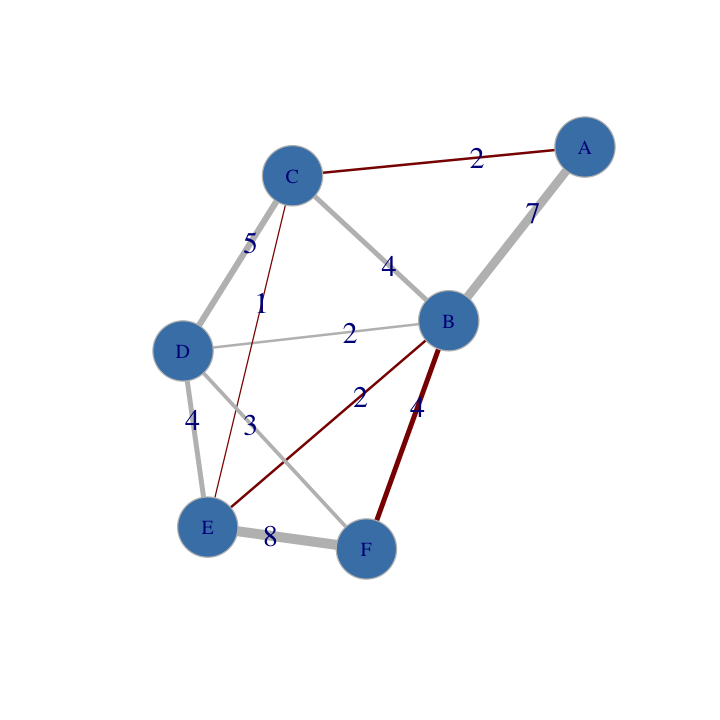

In [17]:
options(repr.plot.width=6,repr.plot.height=6)

E(g)$color <- "gray"
E(g, path=unlist(shortest_path$vpath))$color <- "darkred"

plot(g, layout=layout_nicely(g),
     vertex.color="steelblue",vertex.size=30,vertex.frame.color="gray",
     edge.label=E(g)$weight,edge.label.cex=1.5,edge.width=E(g)$weight)

In [18]:
shortest_path$vpath[[1]]

+ 5/6 vertices, named, from 3e69894:
[1] A C E B F

In [19]:
distances(g)

,A,B,C,D,E,F
A,0,5,2,7,3,9
B,5,0,3,2,2,4
C,2,3,0,5,1,7
D,7,2,5,0,4,3
E,3,2,1,4,0,6
F,9,4,7,3,6,0


In [20]:
answer_dictionary[3] <- distances(g,'A','F')

## 4.
В папке `D:\Pictures\School` находятся следующие файлы и только они:

`kino.gif`

`vano.jpg`

`ono.jpg`

`domino.gif`

`no.jpg`

К этим файлам применили следующую операцию: 

файлы, имена которых удовлетворяют маске `*?no.*g*` переместили в папку `".."` относительно текущей. 

Сколько файлов останется в исходной папке?

---

In the folder `D:\Pictures\School` there are only the following files:

`kino.gif`

`vano.jpg`

`ono.jpg`

`domino.gif`

`no.jpg`

The operation was applied to them: 

files which names satisfy the mask `*?no.*g*` were moved to the folder `".."` relatively to the current one.

How many files will remain in the source folder?

In [21]:
file_list <- c('kino.gif', 'vano.jpg', 'ono.jpg', 'domino.gif', 'no.jpg')

In [22]:
moved_files <- grepl("^.*.no\\..*g.*$", file_list)
moved_files

[1]  TRUE  TRUE  TRUE  TRUE FALSE

In [23]:
c <- length(file_list) - sum(moved_files)
c

[1] 1

In [24]:
answer_dictionary[4] <- toString(c)

## 5.
Для кодирования некоторой последовательности, состоящей из букв `A`, `B`, `C`, `D` и `E`, используется неравномерный двоичный код, позволяющий однозначно декодировать полученную двоичную последовательность. 

Вот этот код: <i style="font-size:130%;" class="font-effect-brick-sign">`A-111`, `B-101`, `C-100`, `D-01`, `E-110`</i>. 

Можно ли сократить для одной или нескольких букв длину кодового слова, удалив в нём один или несколько последних символов, чтобы код по-прежнему можно было декодировать однозначно?

Запишите ответ в виде: буква, кодовое слово. Например, если бы ответ был «Для буквы `F` новый код будет `110`», ответ нужно записать как: <i style="font-size:130%;" class="font-effect-brick-sign">`F110`</i>. Если невозможно ничего сократить, запишите в ответе просто цифру `0`.

---

To encode some sequence consisting of the letters `A`, ` B`,  `C`, ` D` and `E`, an unequal binary code is used, which uniquely decodes the resulting binary sequence.

Here is the code:  <i style="font-size:130%;" class="font-effect-brick-sign">`A-111`, `B-101`, `C-100`, `D-01`, `E-110`</i>.

Is it possible to shorten the length of a codeword for one or more letters by deleting one or more of the last characters in it so that the code can still be decoded uniquely?

Write down the answer in the form: a letter, a code word. For example, if the answer was "For the letter `F`, the new code will be `110`", it should be written as <i style="font-size:130%;" class="font-effect-brick-sign">`F110`</i>. If it is impossible to shorten anything, write down in the answer just the number `0`.

В решении использован Алгоритм Шеннона — Фано.

С `0` начинается только одно кодовое слово последовательности <i style="font-size:130%;" class="font-effect-brick-sign">`D-01`</i>. 

После сокращения на единицу эта буква будет кодироваться <i style="font-size:130%;" class="font-effect-brick-sign">`D-0`</i>, а вся последовательность по-прежнему декодируется однозначно. 

---

The solution uses the Shannon-Fano Algorithm.

In the sequence, only one codeword <i style="font-size:130%;" class="font-effect-brick-sign">`D-01`</i> begins with `0`.

After a reduction of one, this letter will be encoded <i style="font-size:130%;" class="font-effect-brick-sign">`D-0`</i>, and the entire sequence is still possible to decode uniquely.

In [25]:
answer_dictionary[5] <- 'D0'

## 6.
Автомат получает на вход два двузначных шестнадцатеричных числа. В этих числах все цифры не превосходят цифру 5 (если в числе есть цифра больше 5, автомат отказывается работать). По этим числам строится новое шестнадцатеричное число по следующим правилам.

$1.$ Вычисляются два шестнадцатеричных числа — произведение старших разрядов полученных чисел и произведение младших разрядов этих чисел.

$2.$ Полученные два шестнадцатеричных числа записываются друг за другом в порядке возрастания (без разделителей).

Пример: 

| Исходные числа | Цифры в разрядах | Поразрядные произведения | Результат |
|:-:|:-:|:-:|:-:|
| $52_{16}, 44_{16}$ | $5_{16}, 4_{16} = 5_{10}, 4_{10}$ <br> $2_{16}, 4_{16} = 2_{10}, 4_{10}$ |$20_{10} = 14_{16}$ <br> $8_{10} = 8_{16}$ | $814_{16}$ |

Какие из предложенных чисел могут быть результатом работы автомата?

Перечислите в алфавитном порядке буквы, соответствующие этим числам, без пробелов и знаков препинания.

---

The automatic system receives two two-digit hexadecimal numbers. In these numbers, all digits do not exceed 5 (if a digit is more than 5, the system refuses to work). For these numbers, a new hexadecimal number is constructed according to the following rules.

$1.$ Two hexadecimal numbers are computed - the product of the highest digits of the obtained numbers and the product of the lowest digits of these numbers.

$2.$ The resulting two hexadecimal numbers are written consecutively in ascending order (no delimiters).

Example: 

| Initial numbers | Highest and Lowest Digits in Numbers | Bitwise products | Result |
|:-:|:-:|:-:|:-:|
| $52_{16}, 44_{16}$ | $5_{16}, 4_{16} = 5_{10}, 4_{10}$ <br> $2_{16}, 4_{16} = 2_{10}, 4_{10}$ |$20_{10} = 14_{16}$ <br> $8_{10} = 8_{16}$ | $814_{16}$ |

Which of the suggested numbers can be the operation result of the automatic system?

List in alphabetical order the letters corresponding to these numbers, without spaces and punctuation marks.

$A) \ 4B_{16}$

$B) \ AB_{16}$

$C) \ CA_{16}$

$D) \ 9C_{16}$

$E) \ 616_{16}$

Обратные преобразования чисел / Inverse transformation of numbers:

$A) \ 4B_{16} \to 4_{10} = 4_{10} ; B_{16} = 11_{10}$ - простое число 11 не может быть результатом умножения двух чисел, не превышающих 5 / 11 cannot be the result of multiplying two numbers not exceeding 5.

$B) \ AB_{16} \to A_{16} = 10_{10} ; B_{16} = 11_{10}$ - простое число 11 не может быть результатом умножения двух чисел, не превышающих 5 / 11 cannot be the result of multiplying two numbers not exceeding 5.

$C) \ CA_{16}$ - цифры не записаны в порядке возрастания / digits are not written in ascending order.

$D) \ 9C_{16}  \to 9_{10} ; 12_{10} \to 3_{10}, 3_{10}; 3_{10}, 4_{10} \to 3_{16}, 3_{16}; 3_{16}, 4_{16} \to 33_{16}; 34_{16}$

$E) \ 616_{16}$ 

- $61_{16} = 97_{10}; 6_{16} = 6_{10}$ -  произведения не записаны в порядке возрастания / products are not written in ascending order; 

- $616_{16} \to 6_{16} = 6_{10}; 16_{16} = 22_{10}$ - число 22 не может быть результатом умножения двух чисел, не превышающих 5 / 22 cannot be the result of multiplying two numbers not exceeding 5.

In [26]:
answer_dictionary[6] <- 'D'

## 7.
Дан фрагмент электронной таблицы.

The fragment of the spreadsheet is given.

| | A | B | C | D |
|:-:|:-:|:-:|:-:|:-:|
| 1 | 4 | 5 | 3 |  |
| 2 | 2 | 1 | =A1+B2 |  |
| 3 | 6 | 7 | =A&#36;2+B3 | . |

Чему станет равным значение ячейки `D2`, если в неё скопировать формулу из ячейки `C3`?

Примечание: знак &#36; обозначает абсолютную адресацию.

What will the value of the cell `D2` become equal if you copy the formula from the cell `C3` into it?

Note: The &#36; sign denotes absolute addressing.

[Google Sheet](https://drive.google.com/open?id=1QzIl60h-gMt-Ksd8SWi-_eU-I-Hxh8piHdn6ueiMSdM)

Результат копирования ячейки.

The result of copying the cell.

<div style="width: 800px; height: 320px; overflow:auto;">
    <img src="it_images/2017_06_07a.png" width="800" height="320"/>
</div>

In [27]:
answer_dictionary[7] <- '6'

## 8.
Определите, что будет напечатано в результате выполнения следующего фрагмента программы:

Determine what will be printed as a result of the following program fragment:
<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>

k,s = 50,1024

while s > 0:
    s = int(s / 2)
    k -= 3

print (k)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 
    
k <- 50; s <- 1024

while (s > 0) {
    s <- as.integer(s / 2)
    k <- k - 3
}

print(k)
    </code></pre></td>     
  </tr> 
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">BASIC</th> 
    <th style="text-align:center;">Pascal</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='basic'>

DIM k, s AS INTEGER
k = 50
s = 1024
WHILE s > 0
    s = s / 2
    k = k - 3
WEND
PRINT k
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='pascal'> 
    
var k, s : integer;
begin
    k := 50;
    s := 1024;
    while s > 0 do
        s := s / 2;
        k := k - 3;
    end;
    write(k);
end.
    </code></pre></td>     
  </tr>    
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">C</th> 
    <th style="text-align:center;">Natural Language Programming</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='c'>

{
    int k, s;
    k = 50;
    s = 1024;
    while (s > 0)
    {
        s = s / 2;
        k = k - 3;
    } 
    printf("%d", k);
}
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='nlp'> 
    
нач
    цел k, s
    k := 50
    s := 1024
    нц пока s > 0
        s := s / 2
        k := k - 3
    кц
    вывод k
кон
    </code></pre></td>     
  </tr>      
</table>

In [28]:
k <- 50; s <- 1024

while (s > 0) {
    s <- as.integer(s / 2)
    k <- k - 3
}

print(k)

[1] 17


In [29]:
answer_dictionary[8] <- toString(k)

## 9.
Производится двухканальная (стерео) звукозапись с частотой дискретизации 16 кГц и количеством уровней квантования 65536. 

Запись длится 4 минуты, её результаты записываются в файл, сжатие данных не производится. 

Укажите размер полученного файла (в Мбайт) с точностью 5 Мбайт. 

В ответе запишите только целое число, единицу измерения писать не нужно.

---

A two-channel (stereo) sound recording with a sampling frequency of 16 kHz and a number of quantization levels of 65536 is produced. 

The recording lasts 4 minutes, its results are written to a file, data compression is not applied.

Specify the size of the received file (in MB) with the accuracy of 5 MB. 

In the answer, write down only an integer, you do not need to write a unit of measurement.

Показатели, позволяющие определить объем информации.

- Частота дискретизации: $16$ кГц, за одну секунду запоминается $16000$ значений сигнала.
    
- Уровни квантования (глубина дискретизации): $65536 = 2^{16}$ ($16$ бит).
    
- Время записи: $4$ минуты = $240$ секунд.
    
- Запись двухканальная (стерео): объём памяти для хранения данных одного канала умножается на $2$.
   
Размер полученного файла:

$16000 ∗ \log_2{65536} ∗ 240 ∗ 2 = 122880000$ бит или $122880000 \ / \ 2^3 \ / \ 2^{20} \ \approx \ 15$ Мбайт.

---

Indicators to determine the amount of information.

- Sampling frequency: $16$ kHz, for one second, $16,000$ of signal values is memorized.
    
- Quantization levels (sampling depth): $65536 = 2^{16}$ ($16$ bit).
    
- Recording time: $4$ minutes = $240$ seconds.
    
- Two-channel recording (stereo): the amount of memory for storing data of one channel is multiplied by $2$.
   
The size of the received file:

$16000 ∗ \log_2{65536} ∗ 240 ∗ 2 = 122880000$ bits or $122880000 \ / \ 2^3 \ / \ 2^{20} \ \approx \ 15$ MB.

In [30]:
size <- 16000 * log2(65536) * 240 * 2 / 2**3 / 2**20
size

[1] 14.64844

In [31]:
answer_dictionary[9] <- toString(round(size))

## 10.
Вася и Петя передают друг другу сообщения, используя флажки 6-ти цветов. 

Эти они делают, поднимая последовательно один из флажков, потом опускают его и поднимают ещё какой-то. 

Чтобы не путаться, ребята договорились, что флажки в одном сообщении не могут повторяться. 

Сколько различных сообщений могут передавать мальчики?

---

Vasya and Petya relay messages to each other using the flags of 6 different colors. 

They do this, uping one of the flags consistently, then lowering it and raising the next one. 

In order not to be confused, the guys agreed that the flags in one message can not be repeated.

How many different messages can the boys transmit?

1) 

В условии задачи недостаточно четко оговаривается количество сигналов в сообщении.

Рассмотрим все возможные случаи.

The task condition does not clearly specify the number of signals in one message.

Let's consider all possible cases.

| Длина сообщения |  Количество сообщений | 
|:-:|:-:|
| Message Length | Message Number |
| 1 | $6$ |
| 2 | $6 * 5$ |
| 3 | $6 * 5 * 4$ | 
| 4 | $6 * 5 * 4 * 3$ |
| 5 | $6 * 5 * 4 * 3 * 2$ |
| 6 | $6 * 5 * 4 * 3 * 2 * 1$ |


Если в одном сообщении может быть только два сигнала, 

то количество способов выбрать первый флажок равно $6$, второй - $5$ (цвета не могут повторяться). 

Всего сообщений получится $6 * 5 = 30$. 

И т.д.


If there are only two signals in the message, 

the number of ways to choose the first flag is $6$, the second one - $5$ (colors can not be repeated). 

The total number of possible messages will be $6 * 5 = 30$.

Etc.

2)

Всего: / In total:

$6 + 6 * 5 + 6 * 5 * 4 + 6 * 5 * 4 * 3 + 6 * 5 * 4 * 3 * 2 + 6 * 5 * 4 * 3 * 2 * 1 = 1956$

In [32]:
answer_dictionary[10] <- toString(6 + 6 * 5 + 6 * 5 * 4 + 6 * 5 * 4 * 3 + 6 * 5 * 4 * 3 * 2 + 6 * 5 * 4 * 3 * 2 * 1)

## 11.
Определите, сколько звёздочек будет напечатано в результате вызова F(5) приведённой подпрограммы:

Determine how many asterisks will be printed as a result of calling F(5) from this program fragment:

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>

def F(n):
    print('&#42;')
    if n > 1:
        F(int(n / 2))
        F(n - 1)

    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 
    
F <- function(n) {
    print('&#42;')
    if (n > 1) {
        F(as.integer(n / 2))
        F(n - 1)
    }
}
    </code></pre></td>     
  </tr> 
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">BASIC</th> 
    <th style="text-align:center;">Pascal</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='basic'>

SUB F(n)
    PRINT "&#42;";
    IF n > 1 THEN
        F(n / 2)
        F(n - 1)
    END IF
END SUB
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='pascal'> 
    
procedure F(n : integer);
begin
    write('&#42;');
    if n > 1 then
        F(n div 2);
        F(n - 1);
    end;

end
    </code></pre></td>     
  </tr>    
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">C</th> 
    <th style="text-align:center;">Natural Language Programming</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='c'>

void F(int n)
{
    printf("&#42;");
    if (n > 1)
    {
        F(n / 2);
        F(n - 1);
    }
}   
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='nlp'> 
    
алг F(цел n)
нач
    вывод "&#42;"
    если n > 1 то
        F(div(n, 2))
        F(n - 1)
    все
кон
    </code></pre></td>     
  </tr>      
</table>

In [33]:
# расширенная версия программы
c <- 0

F <- function(n) {
    c <<- c + 1
    print(paste('*',toString(c),sep=' '))

    if (n > 1) {
        F(as.integer(n / 2))
        F(n - 1)
    }
}

F(5)

[1] "* 1"
[1] "* 2"
[1] "* 3"
[1] "* 4"
[1] "* 5"
[1] "* 6"
[1] "* 7"
[1] "* 8"
[1] "* 9"
[1] "* 10"
[1] "* 11"
[1] "* 12"
[1] "* 13"


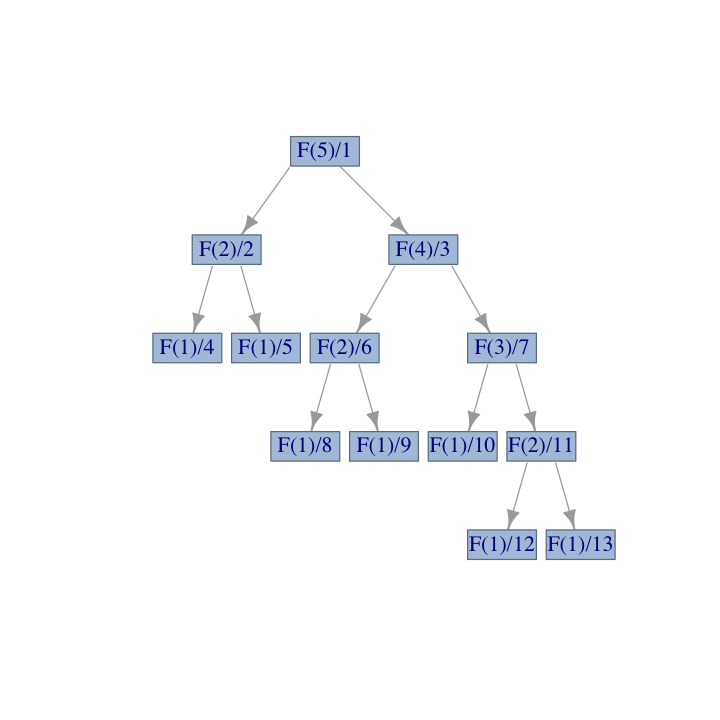

In [34]:
options(repr.plot.width=6,repr.plot.height=6)
edges1 <- c('F(5)/1','F(2)/2', 'F(5)/1','F(4)/3', 
            'F(2)/2','F(1)/4', 'F(2)/2','F(1)/5',
            'F(4)/3','F(2)/6', 'F(4)/3','F(3)/7',
            'F(2)/6','F(1)/8', 'F(2)/6','F(1)/9',
            'F(3)/7','F(1)/10', 'F(3)/7','F(2)/11',
            'F(2)/11','F(1)/12', 'F(2)/11','F(1)/13')

g1 <- graph(edges1)

plot(g1,layout=layout_as_tree(g1),
     vertex.color="lightsteelblue",
     vertex.size=35,vertex.label.cex=1.1,
     vertex.frame.color="slategray",vertex.shape='rectangle')

In [35]:
answer_dictionary[11] <- toString(c)

## 12.
В терминологии сетей TCP/IP маской сети называется двоичное число, определяющее, 

- какая часть IP-адреса узла сети относится к адресу сети, 
- а какая — к адресу самого узла в этой сети. 

Обычно маска записывается по тем же правилам, что и IP-адрес. 

Адрес сети получается в результате применения поразрядной конъюнкции к заданному IP-адресу узла и маске.

По заданным IP-адресу узла и маске определите адрес сети.

IP-адрес узла: `251.137.219.94`

Маска: `255.255.248.0`

При записи ответа выберите из приведённых в таблице чисел четыре элемента IP-адреса и 

запишите в нужном порядке соответствующие им буквы. Точки `.` писать не нужно.

---

In the terminology of TCP / IP networks, a network mask is a binary number that 

- specifies what part of the IP address of the node refers to the network address, 
- and which one to the host address in that network.

Usually, the mask is written using the same rules as the IP address. 

The network address is obtained as a result of applying the bitwise conjunction to the specified node IP address and the mask.

From the given IP-address of the node and the mask, determine the network address.

The IP address is `251.137.219.94`

The mask is: `255.255.248.0`

For recording an answer, select from the numbers in the table four IP address elements and 

write down the corresponding letters in the desired order. Points `.` do not need to be written.

| A | B | C | D | E | F | G | H |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 0 | 94 | 137 | 216 | 219 | 248 | 251 | 255 |

_Пример_.

Пусть искомый IP-адрес `192.168.128.0`, и дана таблица

---

_Example_. 

The desired IP-address is `192.168.128.0`, and the table is given:

| A | B | C | D | E | F | G | H |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 128 | 168 | 255 | 8 | 127 | 0 | 17 | 192 |

В этом случае правильный ответ будет записан в виде: `HBAF`.

---

In this case, the correct answer will be written in the form: `HBAF`.

In [36]:
dec2bin <- function(n) {
  if (n == 0) {
      bv <- '0'
  } else {
      bv <- rep(0, 1 + floor(log(n, 2)))
      while (n >= 2) {
          pow <- floor(log(n, 2))
          bv[1 + pow] <- 1
          n <- n - 2^pow
      }
      bv[1] <- n %% 2
      paste(rev(bv), collapse = "")
  }
}

Переведем IP-адрес узла и маску в бинарную форму.

Let's write the IP-address of the node and the mask into a binary form.

In [37]:
ip <- unlist(strsplit('251.137.219.94','[.]'))
mask <- unlist(strsplit('255.255.248.0','[.]'))

ip_bin <- ''
mask_bin <- '' 

for (i in 1:4) {
    ip_bin_cur <- dec2bin(as.integer(ip[i]))
    if (nchar(ip_bin_cur) < 8) {
        for (k in 1:(8 - nchar(ip_bin_cur))) {
           ip_bin_cur <- paste('0',ip_bin_cur,sep='') 
        }
    }

    mask_bin_cur <- dec2bin(as.integer(mask[i]))
    if (nchar(mask_bin_cur) < 8) {
        for (k in 1:(8 - nchar(mask_bin_cur))) {
           mask_bin_cur <- paste('0',mask_bin_cur,sep='') 
        }
    }
    
    ip_bin <- paste(ip_bin,ip_bin_cur,sep='.')
    mask_bin <- paste(mask_bin,mask_bin_cur,sep='.')

}

ip_bin <- substr(ip_bin,2,nchar(ip_bin))
mask_bin <- substr(mask_bin,2,nchar(mask_bin))

In [38]:
ip_bin; mask_bin

[1] "11111011.10001001.11011011.01011110"

[1] "11111111.11111111.11111000.00000000"

Теперь можно применить поразрядную коньюнкцию.

Now it is possible to apply bitwise conjunctions.

In [39]:
ip_bin <- unlist(strsplit(ip_bin,''))
mask_bin <- unlist(strsplit(mask_bin,''))

net_bin <-''
for (i in 1:35){
    if (mask_bin[i] == '.'){
        net_bin <- paste(net_bin,'.',sep='')
    } else {
        symbol <- toString(as.integer(as.integer(mask_bin[i]) & as.integer(ip_bin[i])))
        net_bin <- paste(net_bin,symbol,sep='')
    }
}

net_bin

[1] "11111011.10001001.11011000.00000000"

In [40]:
net <- ''
for (el in unlist(strsplit(net_bin,'[.]'))) {
    net <- paste(net,toString(bin2dec(el)),sep='.')
}
net <- substr(net,2,nchar(net))

net

[1] "251.137.216.0"

При замене на буквенные обозначения получается:

With replacing the address parts by the letters we get:

In [41]:
string <- unlist(strsplit(net,'[.]'))
codes <- c('0','94','137','216','219','248','251','255')
symbols <- c('A','B','C','D','E','F','G','H')
result <- ''

for (el in string) {
    for (i in 1:8) {
        if (el == codes[i]) {
            result <- paste(result,symbols[i],sep='')
        }
    }
}

result

[1] "GCDA"

In [42]:
answer_dictionary[12] <- result

## 13.
При регистрации в компьютерной системе каждому пользователю выдается пароль, 

- состоящий из 15 символов и 
- содержащий только символы из 12-символьного набора: A, B, C, D, E, F, G, H, K, L, M, N. 

В базе данных для хранения сведений о каждом пользователе отведено одинаковое и минимально возможное целое число байт. 

При этом используют посимвольное кодирование паролей, все символы кодируют одинаковым и минимально возможным количеством бит. 

Кроме собственно пароля, для каждого пользователя в системе хранятся дополнительные сведения, 

для чего отведено 12 байт на одного пользователя.

Определите объём памяти (в байтах), необходимый для хранения сведений о 30 пользователях. 

В ответе запишите только целое число — количество байт.

---

With registering in a computer system, each user is given a password 

- consisting of 15 characters and 
- containing only the characters from the 12-character set: A, B, C, D, E, F, G, H, K, L, M, N. 

In the database for storing information about each user it is allocated the same and the minimum possible integer number of bytes. 

In this case, the character-by-symbol encoding of passwords is used, all symbols are encoded with the same and the minimum possible number of bits. 

In addition to the password itself, another information is stored for each user in the system, 

and for that 12 bytes per user are allocated.

Determine the amount of memory (in bytes) required to store information about 30 users. 

In the answer write down only the whole number - the number of bytes.

) $3 < log_2{12} < 4  => 4$ (бит) - необходимо для кодирования одной из 12 букв латинского алфавита.

Количество возможных вариантов кодировки ($2^4$) не должно быть меньше количества имеющейся информации (12  символов), 

округление в данном случае - всегда в большую сторону.

2) $4 ∗ 15 = 60$ (бит) - необходимо для кодирования 15 символов пароля.

3) $60 / 8 = 7.5 \approx 8$  (байт) - необходимо для кодирования 15 символов пароля.

Количество байт - целое число, и округление опять должно быть только в большую сторону.

4)  $8 + 12 = 20$ (байт) - выделено на одного пользователя для пароля и дополнительной информации.

5)  $20 * 30 = 600$ (байт) - выделено для хранения сведений о 30 пользователях.

---

1) $3 < log_2{12} < 4  => 4$ (bits) - necessary for encoding one of the 12 Latin letters..

The number of possible encoding options ($2^4$) should not be less than the amount of information available (12  сymbols), 

rounding in this case - always in the larger side.

2) $4 ∗ 15 = 60$ (bits) - necessary for encoding 15 password symbols.

3) $60 / 8 = 7.5 \approx 8$  (bytes) - necessary for encoding 15 password symbols.

The number of bytes is an integer, and rounding should only be in the larger side again.

4)  $8 + 12 = 20$ (bytes) - allocated per user for password and additional information.

5)  $20 * 30 = 600$ (bytes) - allocated for 30 users.

In [44]:
bits_for_one_symbol_from_12 <- ceiling(log2(12))
bits_for_15_symbol_from_12 <- 15 * bits_for_one_symbol_from_12

bytes_for_15_symbol_from_12 <- ceiling(bits_for_15_symbol_from_12 / 8)
bytes_per_user <- bytes_for_15_symbol_from_12 + 12

bytes_for_30_users <- bytes_per_user * 30
bytes_for_30_users

[1] 600

In [45]:
answer_dictionary[13] <- toString(bytes_for_30_users)

## 14.
Исполнитель $Редактор$ получает на вход строку цифр и преобразовывает её. 

$Редактор$ может выполнять две команды, в обеих командах `v` и `w` обозначают цепочки цифр.

А) `заменить (v, w)`.

Эта команда заменяет в строке первое слева вхождение цепочки `v` на цепочку` w`. Например, выполнение команды `заменить (222, 34)` преобразует строку `77222277` в строку `7734277`. Если в строке нет вхождений цепочки `v`, то выполнение команды `заменить (v, w)` не меняет эту строку.

Б) `нашлось (v)`.

Эта команда проверяет, встречается ли цепочка `v` в строке исполнителя $Редактор$. Если она встречается, то команда возвращает логическое значение `«истина»`, в противном случае возвращает значение `«ложь»`. Строка при этом не изменяется исполнителем.

Цикл 

`ПОКА` $<условие>$

- $ последовательность \; команд $
    
`КОНЕЦ ПОКА`

выполняется, пока условие истинно.

В конструкции 

`ЕСЛИ` $<условие>$

- `ТО` $команда \; 1$

- `ИНАЧЕ` $команда \; 2$
    
`КОНЕЦ ЕСЛИ`

выполняется `команда 1` (если условие истинно) или `команда 2` (если условие ложно).

Какая строка получится в результате применения приведённой ниже программы к строке, состоящей из 50 идущих подряд цифр 2? 

В ответе запишите полученную строку.

`НАЧАЛО`

`ПОКА` $<нашлось \; (222)>$ `ИЛИ` $<нашлось\; (333)>$
  
- `ЕСЛИ` $<нашлось \; (222)>$ 
  
  - `ТО` $заменить \; (222, 3)$
    
  - `ИНАЧЕ` $заменить \; (333, 2)$

- `КОНЕЦ ЕСЛИ`  

`КОНЕЦ ПОКА`

`КОНЕЦ`

---

The performer $Editor$ receives a string of numbers and converts it. 

It can execute two commands, in both commands, `v` and `w` denote a chain of numbers.

$A)$ `replace (v, w)`.

This command replaces the first from the left with the occurrence of the chain `v` on the chain `w`. For example, executing the command to `replace (222, 34)` converts line `77222277` to line `7734277`. If there are no occurrences of the chain `v` in the string, then the execution of the command to `replace (v, w)` does not change this line.

$B)$ `found (v)`.

This command checks if the string `v` is found in the line. If it occurs, the command returns the logical value of `"true"`, otherwise it returns `"false"`. The string is not changed by the performer in this case.

The cycle

`WHILE` $<condition>$

- $command \; sequence$

`END while`

is executed until the condition is true.


In the construction

`IF` $<condition>$

- `THEN` $command \; 1$

- `ELSE` $command \; 2$

`END IF`

the `command 1` is executed (if the condition is true) or the `command 2` is executed (if the condition is false).

Which line will result from applying for the program below to the line consisting of 50 consecutive digits 2? 

In the answer write down the received line.

`START`

`WHILE` $<found \; (222)>$ `OR` $<found \; (333)>$
  
- `IF` $<found \; (222)>$ 
  
  - `THEN` $replace \; (222, 3)$
    
  - `ELSE` $replace \; (333, 2)$

- `END IF` 

`END WHILE`

`END`

In [49]:
string <- paste(replicate(50, "2"), collapse = "")
string

[1] "22222222222222222222222222222222222222222222222222"

In [50]:
grepl("222",string); grepl("333",string)

[1] TRUE

[1] FALSE

In [52]:
string_function <- function(w) {
    while (grepl("222",w) | grepl("333",w)) {
        
        if (grepl("222",w)) { 
            w <- sub('222','3',w)
            print(w)
        } else {
            w <- sub('333','2',w)
            print(w)
        }
    }
    
    return(w)
}

result <- string_function(string)

[1] "322222222222222222222222222222222222222222222222"
[1] "3322222222222222222222222222222222222222222222"
[1] "33322222222222222222222222222222222222222222"
[1] "333322222222222222222222222222222222222222"
[1] "3333322222222222222222222222222222222222"
[1] "33333322222222222222222222222222222222"
[1] "333333322222222222222222222222222222"
[1] "3333333322222222222222222222222222"
[1] "33333333322222222222222222222222"
[1] "333333333322222222222222222222"
[1] "3333333333322222222222222222"
[1] "33333333333322222222222222"
[1] "333333333333322222222222"
[1] "3333333333333322222222"
[1] "33333333333333322222"
[1] "333333333333333322"
[1] "2333333333333322"
[1] "22333333333322"
[1] "222333333322"
[1] "3333333322"
[1] "23333322"
[1] "223322"


In [53]:
answer_dictionary[14] <- result

## 15.
На рисунке — схема дорог, связывающих города А, Б, В, Г, Д, Е, Ж, З, И, К. 

По каждой дороге можно двигаться только в одном направлении, указанном стрелкой. 

Сколько существует различных путей из города А в город К?

---

In the figure - the scheme of roads is connecting the cities А, Б, В, Г, Д, Е, Ж, З, И, К. 

For each road, it is possible to move only in one direction, indicated by an arrow. 

How many different paths exist from the city А to the city К?

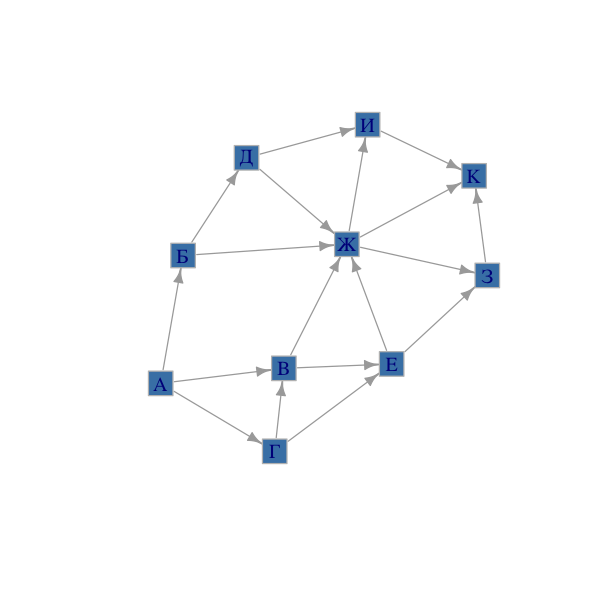

In [54]:
options(warn = -1,repr.plot.width=5,repr.plot.height=5)
edges <- c('А','Б', 'А','В', 'А','Г', 'Б','Д', 'Б','Ж',
           'В','Е', 'В','Ж', 'Г','В', 'Г','Е',
           'Д','И', 'Д','Ж', 'Е','Ж', 'Е','З',
           'Ж','З', 'Ж','И', 'Ж','К', 'З','К', 'И','К')
g2 <- graph(edges)
plot(g2,
     vertex.color="steelblue",vertex.size=15,
     vertex.frame.color="gray",vertex.shape='square')

In [55]:
paths <- all_simple_paths(g2,'А','К')
paths <- lapply(1:length(paths), function(x) as_ids(paths[[x]]))
paths

[[1]]
[1] "А" "Б" "Д" "Ж" "И" "К"

[[2]]
[1] "А" "Б" "Д" "Ж" "З" "К"

[[3]]
[1] "А" "Б" "Д" "Ж" "К"

[[4]]
[1] "А" "Б" "Д" "И" "К"

[[5]]
[1] "А" "Б" "Ж" "И" "К"

[[6]]
[1] "А" "Б" "Ж" "З" "К"

[[7]]
[1] "А" "Б" "Ж" "К"

[[8]]
[1] "А" "В" "Ж" "И" "К"

[[9]]
[1] "А" "В" "Ж" "З" "К"

[[10]]
[1] "А" "В" "Ж" "К"

[[11]]
[1] "А" "В" "Е" "Ж" "И" "К"

[[12]]
[1] "А" "В" "Е" "Ж" "З" "К"

[[13]]
[1] "А" "В" "Е" "Ж" "К"

[[14]]
[1] "А" "В" "Е" "З" "К"

[[15]]
[1] "А" "Г" "В" "Ж" "И" "К"

[[16]]
[1] "А" "Г" "В" "Ж" "З" "К"

[[17]]
[1] "А" "Г" "В" "Ж" "К"

[[18]]
[1] "А" "Г" "В" "Е" "Ж" "И" "К"

[[19]]
[1] "А" "Г" "В" "Е" "Ж" "З" "К"

[[20]]
[1] "А" "Г" "В" "Е" "Ж" "К"

[[21]]
[1] "А" "Г" "В" "Е" "З" "К"

[[22]]
[1] "А" "Г" "Е" "Ж" "И" "К"

[[23]]
[1] "А" "Г" "Е" "Ж" "З" "К"

[[24]]
[1] "А" "Г" "Е" "Ж" "К"

[[25]]
[1] "А" "Г" "Е" "З" "К"

In [56]:
answer_dictionary[15] <- toString(length(paths))

## 16.
Запись десятичного числа в системах счисления с основаниями 4 и 7 в обоих случаях имеет последней цифрой 0. 

Какое минимальное натуральное десятичное число удовлетворяет этому требованию?

---

Recording a decimal number in the number systems with bases 4 and 7 in both cases has the last digit 0.

What is the minimum natural decimal number that satisfies this requirement?

Последняя цифра 0 означает, что исходное десятичное число делится на 4 и на 7 без остатка.

Поскольку у 4 и 7 нет общих множителей, искомым минимальным числом является их произведение.

---

The last digit 0 means that the original decimal number is divided by 4 and by 7 without residue.

Since 4 and 7 do not have common multipliers the desired minimum number is their product.

In [57]:
answer_dictionary[16] <- toString(4 * 7)

## 17.
В языке запросов к поисковому серверу 

- для обозначения логической операции `«ИЛИ»` используется символ `|`, 
- а для логической операции `«И»` — `&`. 

В таблице приведено количество страниц, которое находит поисковая система по каждому запросу.

---

In the query language to the search server, 
- the symbol `"|"` is used to indicate the logical operation `"OR"`, 
- and for the logical operation `"AND"` - `"&"`. 

The table shows the number of pages that the search engine finds for each query.

| Запрос | Количество найденных страниц (в тысячах) |
|:-:|:-:|
| Query | Number of pages found |
| $Колбаса \ \mid \ Сыр \ \mid \ Паштет$ | 26 |
| $Паштет$ | 13 |
| $Сыр$ | 8 |
| $Колбаса \ \& \ Паштет$ | 3 |
| $Сыр \ \& \ Паштет$ | 2 |
| $Колбаса \ \& \ Сыр$ | 2 |
| $Колбаса \ \& \ Сыр \ \& \ Паштет$ | 1 |

Какое количество страниц (в тысячах) будет найдено этой поисковой системой по запросу $Колбаса$?

---

How many pages (in thousands) will be found on the query  $Колбаса$?

`Колбаса ∣ Сыр ∣ Паштет` = `Колбаса` + `Сыр` + `Паштет` - `Колбаса & Паштет` - `Сыр & Паштет` - `Колбаса & Сыр` + `Колбаса & Сыр & Паштет` 

`Колбаса` = `Колбаса ∣ Сыр ∣ Паштет` + `Колбаса & Паштет` + `Сыр & Паштет` + `Колбаса & Сыр` - `Колбаса & Сыр & Паштет` - `Сыр` - `Паштет`

In [59]:
Sausage_or_Cheese_or_Pate <- 26
Pate <- 13
Cheese <- 8
Sausage_and_Pate <- 3
Cheese_and_Pate <- 2
Sausage_and_Cheese <- 2
Sausage_and_Cheese_and_Pate <- 1

Sausage = Sausage_or_Cheese_or_Pate + 
          Sausage_and_Pate + Sausage_and_Cheese + Cheese_and_Pate - 
          Sausage_and_Cheese_and_Pate - Cheese - Pate
Sausage

[1] 11

In [60]:
answer_dictionary[17] <- toString(Sausage)

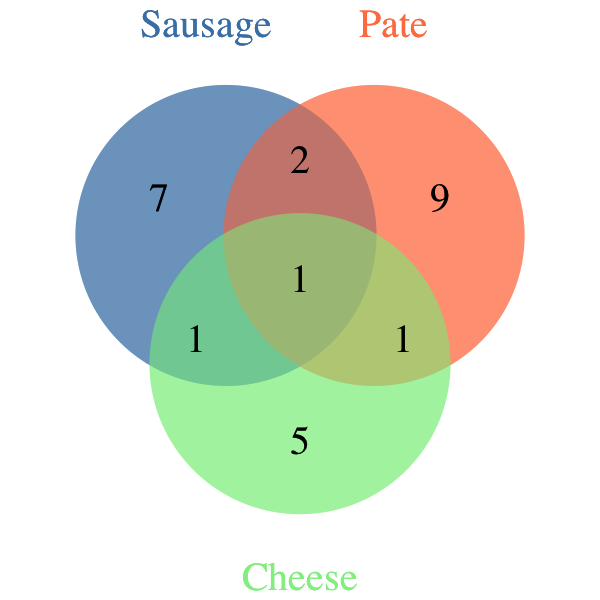

In [78]:
options(repr.plot.width=5,repr.plot.height=5)
venn.plot <- draw.triple.venn(
    area1 = Sausage, area2 = Pate, area3 = Cheese,
    n12 = Sausage_and_Pate, n23 = Cheese_and_Pate, n13 = Sausage_and_Cheese,
    n123 = Sausage_and_Cheese_and_Pate,
    category = c("Sausage", "Pate", "Cheese"),
    fill = c("steelblue", "coral", "lightgreen"),
    lty = "blank",
    cex = 2, cat.cex = 2, 
    cat.dist = c(0.1, 0.1, -0.5), cat.pos = c(-5, 5, 0),
    cat.col = c("steelblue", "coral", "lightgreen")
);
grid.draw(venn.plot);
grid.newpage();

## 18.
На числовой прямой даны отрезки $Р = [5, 13]$ и $Q = [8, 19]$. 

Укажите наибольшую возможную длину такого отрезка $A$, что формула  

$\neg ( (x \in P) \to \neg (x \in Q)) \lor \neg (x \in A)$

верна при любых значениях $х$.

---

On the number line are given the segments $Р = [5, 13]$ and $Q = [8, 19]$.

Indicate the largest possible length of such a segment $A$ that formula

$\neg ( (x \in P) \to \neg (x \in Q)) \lor \neg (x \in A)$

is true for any values of $x$.

$\neg ( (x \in P) \to \neg (x \in Q)) \lor \neg (x \in A) \iff \\
\neg (\neg (x \in P) \lor \neg (x \in Q)) \lor \neg (x \in A) \iff \\
\iff \neg \neg ((x \in P) \land (x \in Q)) \lor \neg (x \in A) \iff \\
((x \in P) \land (x \in Q)) \lor \neg (x \in A) \ (*)$

$ (*) \iff (((5 \leq \ x \ \leq 13) \land (8 \leq \ x \ \leq 19)) \lor \neg (x \in A)) \ \equiv \ TRUE \iff \\
\iff (8 \leq \ x \ \leq 13) \lor \neg (x \in A)) \ \equiv \ TRUE \iff (x \in A) \ \equiv (8 \leq \ x \ \leq 13)$

In [79]:
answer_dictionary[18] <- toString(13 - 8)

## 19.
В программе используется целочисленный массив $A$ с индексами от 0 до 9. 

Значения элементов массива равны $4; 5; 4; 7; 10; 8; 9; 11; 7; 6$ соответственно, т.е. $A[0] = 4$; $A[1] = 5$ и т.д.

Определите значение переменной $max$ после выполнения следующего фрагмента программы, 

записанной ниже на разных языках программирования.

---

The program uses an integer array $A$ with indices from 0 to 9. 

The values of the array elements are $4; 5; 4; 7; 10; 8; 9; 11; 7; 6$ respectively, i.e.  $A[0] = 4$; $A[1] = 5$, etc.

Determine the value of the variable $max$ after executing the next program fragment, 

written down below in different programming languages.
<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>

A = [4,5,4,7,10,8,9,11,7,6]
k = 0
max = A[0]

for i in range(1,10): 
    if A[i] >= A[k]:
        max = A[i]
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 
    
A <- c(4,5,4,7,10,8,9,11,7,6)
k <- 1
max <- A[1]

for (i in 2:10) {
    if (A[i] >= A[k]){
        max <- A[i]
    }
}      
    </code></pre></td>     
  </tr> 
</table>  

In [81]:
A <- c(4,5,4,7,10,8,9,11,7,6)
k <- 1
max_ <- A[1]
for (i in 2:10) {
    if (A[i] >= A[k]){
        max_ <- A[i]
    }
}  

max_

[1] 6

In [82]:
answer_dictionary[19] <- toString(max_)

## 20. 
Ниже на нескольких языках записан алгоритм. Получив на вход число $х$, этот алгоритм печатает два числа $L$ и $М$. 

Укажите наибольшее из таких чисел $х$, при вводе которых алгоритм печатает сначала 3, а потом 7.

Below, in several languages, the algorithm is written. Having received the input number $х$, this algorithm prints two numbers $L$ and $М$.

Specify the largest numbers $х$, for which the algorithm prints at first 3, and then 7.
<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
    
x = int(input())
L, M = 0, 9

while x > 0:
    L += 1
    if M > x % 10:
        M = x % 10
    x = int(x / 10)

print(L, M)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 
    
x <- as.integer(readline())
L <- 0; M <- 9

while (x > 0){
    L <- L + 1
    if (M > x %% 10) {
        M <- x %% 10
    }
    x <- as.integer(x / 10)
}

print(paste(L, M, sep=" "))   
    </code></pre></td>     
  </tr> 
</table>  

In [84]:
x <- as.integer(readline())
L <- 0; M <- 9

while (x > 0){
    L <- L + 1
    if (M > x %% 10) {
        M <- x %% 10
    }
    x <- as.integer(x / 10)
}

print(paste(L, M, sep=" ")) 

997
[1] "3 7"


In [86]:
# расширенная версия программы
MAX <- 0
for (x in 981:1000) {  
    L <- 0; M <- 9
    t <- x
    
    while (x > 0){
        L <- L + 1
        if (M > x %% 10) {
            M <- x %% 10
        }
        if (L == 3 & M == 7 & MAX < t) {
            MAX <- t
        }
        x <- as.integer(x / 10)
    }    
    print(sprintf("%i %i %i", t, L, M))
}

[1] "981 3 1"
[1] "982 3 2"
[1] "983 3 3"
[1] "984 3 4"
[1] "985 3 5"
[1] "986 3 6"
[1] "987 3 7"
[1] "988 3 8"
[1] "989 3 8"
[1] "990 3 0"
[1] "991 3 1"
[1] "992 3 2"
[1] "993 3 3"
[1] "994 3 4"
[1] "995 3 5"
[1] "996 3 6"
[1] "997 3 7"
[1] "998 3 8"
[1] "999 3 9"
[1] "1000 4 0"


Алгоритм вычисляет количество цифр в исходном числе (L) и определяет минимальную цифру среди них (M). 

L=3, M=7 печатается для трехзначного числа с минимальной цифрой 7. 

Максимальным среди чисел такого вида будет 997.

---

The algorithm calculates the number of digits in the original number (L) and determines the minimum digit among them (M). 

L = 3, M = 7 is printed for a three-digit number with a minimum digit 7. 

The maximum among the numbers of this kind will be 997.

In [87]:
answer_dictionary[20] <- toString(MAX)

## 21.
Определите, при каком наименьшем значении $b$ в результате выполнения следующего алгоритма будет напечатано число 20 

(для Вашего удобства алгоритм представлен на нескольких языках):

---

Determine at what the smallest value of $b$ as a result of the following algorithm will be printed the number 20 

(for your convenience, the algorithm is presented in several languages):
<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
    
def F(x):
    if x == 0: 
        return 0
    else: 
        return 7 + F(x - 1)
    
b = int(input())
a = 0

while F(a) < b:
    a += 1

print(a)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 
    
F <- function(x) {
    if (x == 0) {
        return (0)
    } else {
        return(7 + F(x - 1))
    }
} 

b <- as.integer(readline())
a <- 0

while (F(a) < b) {
    a <- a + 1
}

print(a)
    </code></pre></td>     
  </tr> 
</table>  

In [90]:
F <- function(x) {
    if (x == 0) {
        return (0)
    } else {
        return(7 + F(x - 1))
    }
} 

b <- as.integer(readline())
a <- 0

while (F(a) < b) {
    a <- a + 1
}

print(a)

134
[1] 20


In [91]:
# расширенная версия программы
F <- function(x) {
    if (x == 0) {
        return (0)
    } else {
        return(7 + F(x - 1))
    }
} 

A <- matrix(nrow=2, ncol=200-99)

for (b in 100:200) {
    a <- 0
    
    while (F(a) < b) {
        a <- a + 1
    }
    
    A[1,b-99] <- b
    A[2,b-99] <- a    
}

print("Pairs [b,a]:")
print(A)

[1] "Pairs [b,a]:"
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]  100  101  102  103  104  105  106  107  108   109   110   111   112   113
[2,]   15   15   15   15   15   15   16   16   16    16    16    16    16    17
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]   114   115   116   117   118   119   120   121   122   123   124   125
[2,]    17    17    17    17    17    17    18    18    18    18    18    18
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]   126   127   128   129   130   131   132   133   134   135   136   137
[2,]    18    19    19    19    19    19    19    19    20    20    20    20
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]   138   139   140   141   142   143   144   145   146   147   148   149
[2,]    20    20    20    21    21    21    21    21    21    21    22    22
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [

Алгоритм вычисляет количество целых неотрицательных чисел, кратных 7 и меньших параметра $b$. 

При $b \leq 133$ таких чисел будет меньше 20. При $b = 134$ их станет 20: $\{0, 7, 14, ..., 133\}$.

The algorithm calculates the number of non-negative integers that are multiples of 7 and smaller than the parameter $b$.

For $b \leq 133$ the quantity of these numbers will be less than 20. For $b = 134$, it will be 20: $\{0, 7, 14, ..., 133 \}$.

In [92]:
answer_dictionary[21] <- '134'

## 22.
У исполнителя `Удвоитель` две команды, которым присвоены номера:

$1$. `прибавь 1`,

$2$. `умножь на 2`.

Первая из них увеличивает число на экране на 1, вторая удваивает его. 

Программа для `Удвоителя` — это последовательность команд.

Сколько есть программ, которые число 2 преобразуют в число 25?

---

The performer `Doubler` has two enumerated commands:

$1$. `add 1`,

$2$. `multiply by 2`.

The first of them increases the number on the screen by 1, the second doubles it.

The program for `Doubler` is a sequence of commands.

How many programs are there, which number 2 is converted to 25?

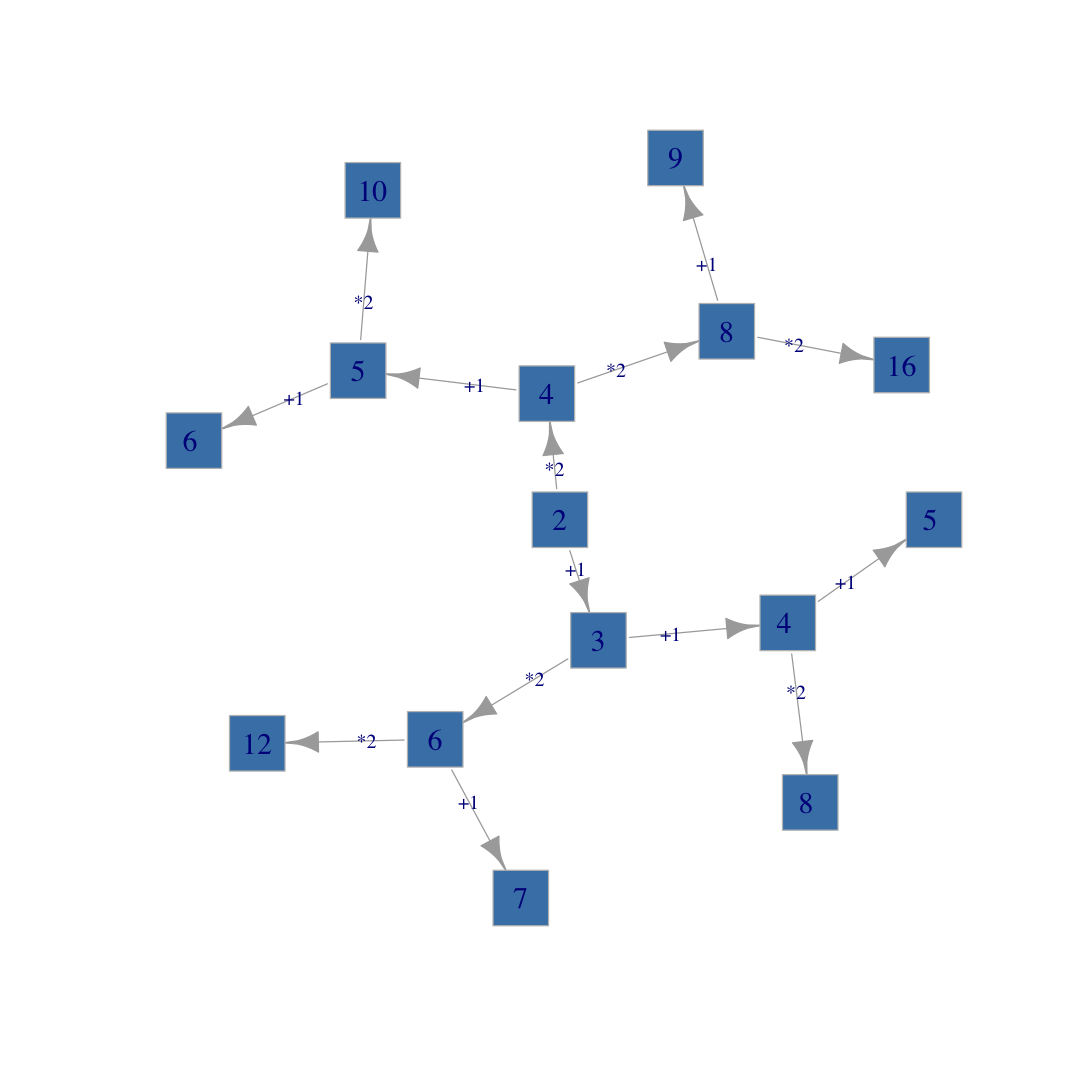

In [94]:
options(repr.plot.width=9,repr.plot.height=9)
edges1 <- c('2','3', '2','4', '3','4 ', '3','6', '4','5', '4','8',
            '4 ','5 ', '4 ','8 ', '6','7', '6','12', 
            '5','6 ', '5','10', '8','9', '8','16')

elabels <- c('+1','*2', '+1','*2', '+1','*2', '+1','*2',
             '+1','*2', '+1','*2', '+1','*2', '+1','*2')

g1 <- graph(edges1)

plot(g1,layout=layout_as_tree(g1,circular=TRUE),
     edge.label=elabels,vertex.color="steelblue",
     vertex.size=15,vertex.label.cex=1.5,
     vertex.frame.color="gray",vertex.shape='square')

| Начальное число → Конечное число | Количество программ | Примечание |
|:-|:-|:-|
| Start → End | Number of Programs | Notes |
| 2 → 3 | 1 | `2+1` |
| 2 → 4 | 2 | `2+1+1`, `2*2` |
| 2 → 5 | 2 | `2+1+1+1`, `2*2+1` |
| 2 → 6 | 3 | = 2 → 3 + 2 → 4 |
| 2 → 7 | 3 | = 2 → 6 |
| 2 → 8 | 5 | 2 → 4 + 2 → 6 |
| 2 → 9 | 5 | = 2 → 8 |
| 2 → 10 | 7 | = 2 → 5 + 2 → 8 |
| 2 → 11 | 7 | = 2 → 10 |
| 2 → 12 | 10 | = 2 → 6 + 2 → 10 |
| 2 → 13 | 10 | = 2 → 12 |
| 2 → 14 | 13 | = 2 → 7 + 2 → 12 |
| 2 → 15 | 13 | = 2 → 14 |
| 2 → 16 | 18 | = 2 → 8 + 2 → 14 |
| 2 → 17 | 18 | = 2 → 16 |
| 2 → 18 | 23 | = 2 → 9 + 2 → 16 |
| 2 → 19 | 23 | = 2 → 18 |
| 2 → 20 | 30 | = 2 → 10 + 2 → 18 |
| 2 → 21 | 30 | = 2 → 20 |
| 2 → 22 | 37 | = 2 → 11 + 2 → 20 |
| 2 → 23 | 37 | = 2 → 22 |
| 2 → 24 | 47 | = 2 → 12 + 2 → 22 |
| 2 → 25 | 47 | = 2 → 24 |

In [112]:
x <- c(2)

for (i in 0:17) {    
    n <- as.integer(length(x) - 2 ** i + 1)
    y <- c(); z <- c()
    
    for (j in n:length(x)) {
        y <- c(y, x[j] + 1) 
        z <- c(z, x[j] * 2)
    }
    
    x <- c(x, y, z)
}

length(x)

[1] 524287

In [113]:
nt <- table(x)
nt[1:52]

x
  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
  1   1   2   2   3   3   5   5   7   7  10  10  13  13  18  18  23  23  30  29 
 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
 35  34  43  41  49  47  57  54  64  60  73  68  80  73  89  81  95  85 104  93 
 42  43  44  45  46  47  48  49  50  51  52  53 
110  98 120 107 126 110 136 119 141 123 152 131 

In [114]:
rm(x)

In [115]:
# answer_dictionary[22] <- toString(nt[names(nt) == 25])

In [118]:
answer_dictionary[22] <- '47'

## 23.
Сколько существует различных наборов значений логических переменных $x_1, х_2, ... х_7 $, 

которые удовлетворяют всем перечисленным ниже условиям? 

В ответе не нужно перечислять все различные наборы значений $x_1, х_2, ... х_7$, 

при которых выполнена данная система равенств. 

В качестве ответа вам нужно указать количество таких наборов.

---

How many different sets of values of logical variables $x_1, х_2, ... х_7$ exist 

that satisfy all the conditions listed below?

In the answer it is not necessary to list all the different sets of values $x_1, х_2, ... х_7$ 

for which the given system of equations is satisfied. 

As an answer, you need to specify only the number of such sets.

- $ (x_1 \equiv \neg x_2) \lor (x_1 \land \neg x_3) \lor (\neg x_1 \land x_3) = 1 $  **(1)**
- $ (x_2 \equiv \neg x_3) \lor (x_2 \land \neg x_4) \lor (\neg x_2 \land x_4) = 1 $  **(2)**
- $ (x_3 \equiv \neg x_4) \lor (x_3 \land \neg x_5) \lor (\neg x_3 \land x_5) = 1 $  **(3)**
- $ (x_4 \equiv \neg x_5) \lor (x_4 \land \neg x_6) \lor (\neg x_4 \land x_6) = 1 $  **(4)**
- $ (x_5 \equiv \neg x_6) \lor (x_5 \land \neg x_7) \lor (\neg x_5 \land x_7) = 1 $  **(5)**

| $x_1$ | $x_3$ | $(x_1 \land \neg x_3) \lor (\neg x_1 \land x_3)$ | $x_1 \equiv \neg x_3$ |
|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 0 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 0 | 0 |

Согласно приведенной таблице истинности:

According to the truth table:

 $((x_1 \land \neg x_3) \lor (\neg x_1 \land x_3)) \equiv (x_1 \equiv \neg x_3)$
 
Исходная система уравнений будет равносильна:

The initial system of equations is equivalent to:

- $ (x_1 \equiv \neg x_2) \lor (x_1 \equiv \neg x_3) = 1 \ (1*)$  
- $ (x_2 \equiv \neg x_3) \lor (x_2 \equiv \neg x_4) = 1 \ (2*)$  
- $ (x_3 \equiv \neg x_4) \lor (x_3 \equiv \neg x_5) = 1 \ (3*)$  
- $ (x_4 \equiv \neg x_5) \lor (x_4 \equiv \neg x_6) = 1 \ (4*)$  
- $ (x_5 \equiv \neg x_6) \lor (x_5 \equiv \neg x_7) = 1 \ (5*)$ 

1) 

Тождество $(1*)$ выполнется только для 6 наборов переменных $(x_1,x_2,x_3)$ из 8 возможных: 

The identity $(1*)$ is satisfied only for 6 sets of variables $(x_1,x_2,x_3)$ from 8 possible ones: 

(0,0,1), (0,1,0), (1,0,0), (1,1,0), (0,1,1), (1,0,1).

2) 

Эти решения $(x_1,x_2,x_3)$ должны пересекаться со множеством решений тождества $(2*)$ для переменных $(x_2,x_3,x_4)$. 

Два набора $(x_1,x_2,x_3)$ (1,0,0) или (0,1,1) могут быть решениями $(2*)$ только, если $(x_1,x_2,x_3,x_4)$ равны (1,0,0,1) или (0,1,1,0) соответственно. 

Для остальных 4 наборов $(x_1,x_2,x_3)$ переменная $x_4$ может принимать любые значения. 

Все решениями системы уравнений $(1*)$ и $(2*)$ являются $2 + 4 * 2 = 10$ наборов переменных $(x_1,x_2,x_3,x_4)$.

These sets $(x_1, x_2, x_3)$ must intersect the set of solutions of the identity $(2*)$ for the variables $(x_2, x_3, x_4)$. 

Two sets $(x_1, x_2, x_3)$ (1,0,0) or (0,1,1) can be solutions of $(2 *)$ only if $(x_1, x_2, x_3, x_4)$ are equal to (1,0,0,1) or (0,1,1,0) respectively. 

For the remaining 4 sets $(x_1, x_2, x_3)$, the variable $x_4$ can take any values. 

All solutions of the system of equations $(1 *)$ and $(2 *)$ are $2 + 4 * 2 = 10$ sets of variables $(x_1, x_2, x_3, x_4)$.

3) 

Рассуждая аналогично: 

   - решениями тождеств $(1*)$, $(2*)$, $(3*)$ будут $4 + 6 * 2 = 16$ наборов переменных; 
   
   - решениями тождеств $(1*)$, $(2*)$, $(3*)$ , $(4*)$  будут $6 + 10 * 2 = 26$ наборов переменных;
   
   - решениями тождеств $(1*)$, $(2*)$, $(3*)$ , $(4*)$, $(5*)$  будут $10 + 16 * 2 = 42$ набора переменных.
   
Arguing similarly, we get:

   - $4 + 6 * 2 = 16$ sets $(x_1, x_2, x_3, x_4, x_5)$ are solutions of the system $(1 *)$, $(2*)$, $(3*)$;

   - $6 + 10 * 2 = 26$ sets $(x_1, x_2, x_3, x_4, x_5, x_6)$ are solutions of the system $(1*), (2*), (3*), (4*)$;
   
   - $10 + 16 * 2 = 42$ sets $(x_1, x_2, x_3, x_4, x_5, x_6, x_7)$ are solutions of the system $(1*), (2*), (3*), (4*), (5*)$.

In [116]:
# check the decision method
bc <- bincombinations(7)
c <- 0
n <- length(bc)/7

logical_function <- function(k,l,m) {
    (k == !l) | (k == !m)
}

for (i in 1:n){
    el <- bc[i,]
    e1 <- logical_function(el[1],el[2],el[3])
    e2 <- logical_function(el[2],el[3],el[4])
    e3 <- logical_function(el[3],el[4],el[5])
    e4 <- logical_function(el[4],el[5],el[6])
    e5 <- logical_function(el[5],el[6],el[7])
    
    result <- (e1 == 1) & (e2 == 1) & (e3 == 1) & (e4 == 1) & (e5 == 1)
    
    if (result == 1) {
        c <- c + 1
    }
}
c

[1] 42

In [117]:
answer_dictionary[23] <- toString(c)

## Часть 2 &nbsp; &nbsp; &nbsp; Part 2
## 24.
Требовалось написать программу, которая вводит с клавиатуры натуральное число  N (N<109)N (N<109)  и выводит на экран наибольшую цифру числа.

Программист торопился и написал программу неправильно.

Выполните следующие действия:

11 . Напишите, что выведет программа при вводе числа 527.

22 . Приведите пример такого числа, при котором программа работает верно.

33 . Укажите все ошибки в программе и исправьте их.

Для этого для каждой ошибки: выпишите строку, которая написана неправильно и приведите правильный вариант строки.

It was required to write a program that enters from the keyboard a natural number  N (N<109)N (N<109)  and displays the largest digit of this number on the screen.

The programmer was in a hurry and wrote the program incorrectly.

Do the following:

11 . Write what the program will output when you enter the number 527.

22 . Give an example of a number, for which the program works correctly.

33 . Specify all errors in the program and correct them.

To do this, for each error: write out the line that was written incorrectly and give the correct version of the line.

## 25.

## 26.

## 27.

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [119]:
answer_dictionary

<hash> containing 23 key-value pair(s).
  1 : 2
  10 : 1956
  11 : 13
  12 : GCDA
  13 : 600
  14 : 223322
  15 : 25
  16 : 28
  17 : 11
  18 : 5
  19 : 6
  2 : 245
  20 : 997
  21 : 134
  22 : 47
  23 : 42
  3 : 9
  4 : 1
  5 : D0
  6 : D
  7 : 6
  8 : 17
  9 : 15